In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from prophet import Prophet

In [2]:
url = 'https://rest.coinapi.io/v1/ohlcv/BITSTAMP_SPOT_BTC_USD/latest?period_id=1MIN'
headers = {'X-CoinAPI-Key' : '14B618A0-166C-4DA7-8C95-994518D018B7'}
params = {
    "period_id": "1Year",
    "time_period_start": "2023-01-01T00:00:00",
    "time_period_end": "2014-06-20T23:59:59",
    "limit": 10000,  # Adjust this limit as per your needs

}
response = requests.get(url, headers=headers,params=params)
data=response.json()

In [3]:
dates = [pd.to_datetime(item['time_period_start']).date() for item in data]
open_prices = [item['price_open'] for item in data]
close_prices = [item['price_close'] for item in data]
high_prices = [item['price_high'] for item in data]
low_prices = [item['price_low'] for item in data]


df = pd.DataFrame({'Date': dates, 'Open': open_prices, 'Close': close_prices, 'High':high_prices, 'Low':low_prices})
df.to_csv('Bitcoin.csv')

In [4]:
df=pd.read_csv('Bitcoin prices.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,9/18/2014,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
1,9/19/2014,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
2,9/20/2014,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
3,9/21/2014,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
4,9/22/2014,399.100006,406.915985,397.130005,402.152008,402.152008,2.412760e+07
...,...,...,...,...,...,...,...
3120,4/4/2023,27795.273440,28433.742190,27681.304690,28168.089840,28168.089840,1.528454e+10
3121,4/5/2023,28169.726560,28739.238280,27843.763670,28177.984380,28177.984380,1.705232e+10
3122,4/6/2023,28175.226560,28178.384770,27738.759770,28044.140630,28044.140630,1.383781e+10
3123,4/7/2023,28038.966800,28111.593750,27794.031250,27925.859380,27925.859380,1.086168e+10


In [5]:
df['Date']=pd.to_datetime(df['Date'])

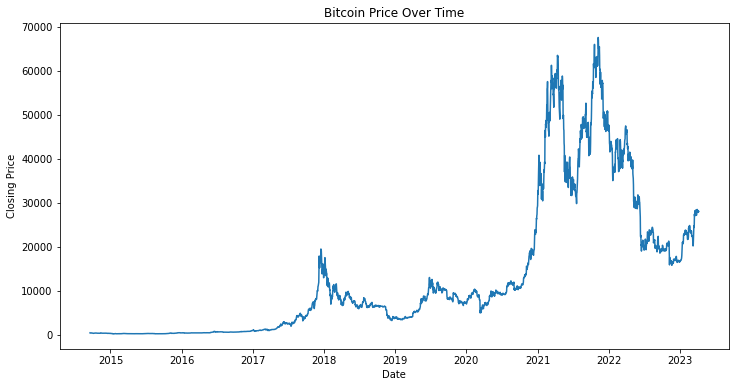

In [6]:
# Visualize the Bitcoin prices over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'],df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Bitcoin Price Over Time')
plt.show()

In [7]:
dit=df[['Date','Close']]
dit=dit.rename(columns={'Date':'ds','Close':'y'})
dit

,ds,y
0,2014-09-18,424.440002
1,2014-09-19,394.795990
2,2014-09-20,408.903992
3,2014-09-21,398.821014
4,2014-09-22,402.152008
...,...,...
3120,2023-04-04,28168.089840
3121,2023-04-05,28177.984380
3122,2023-04-06,28044.140630
3123,2023-04-07,27925.859380


In [8]:
dit['ds']=pd.to_datetime(dit['ds'])
dit.set_index('ds',inplace=True)

close_price = dit['y']

decomposition = seasonal_decompose(close_price, model='additive')

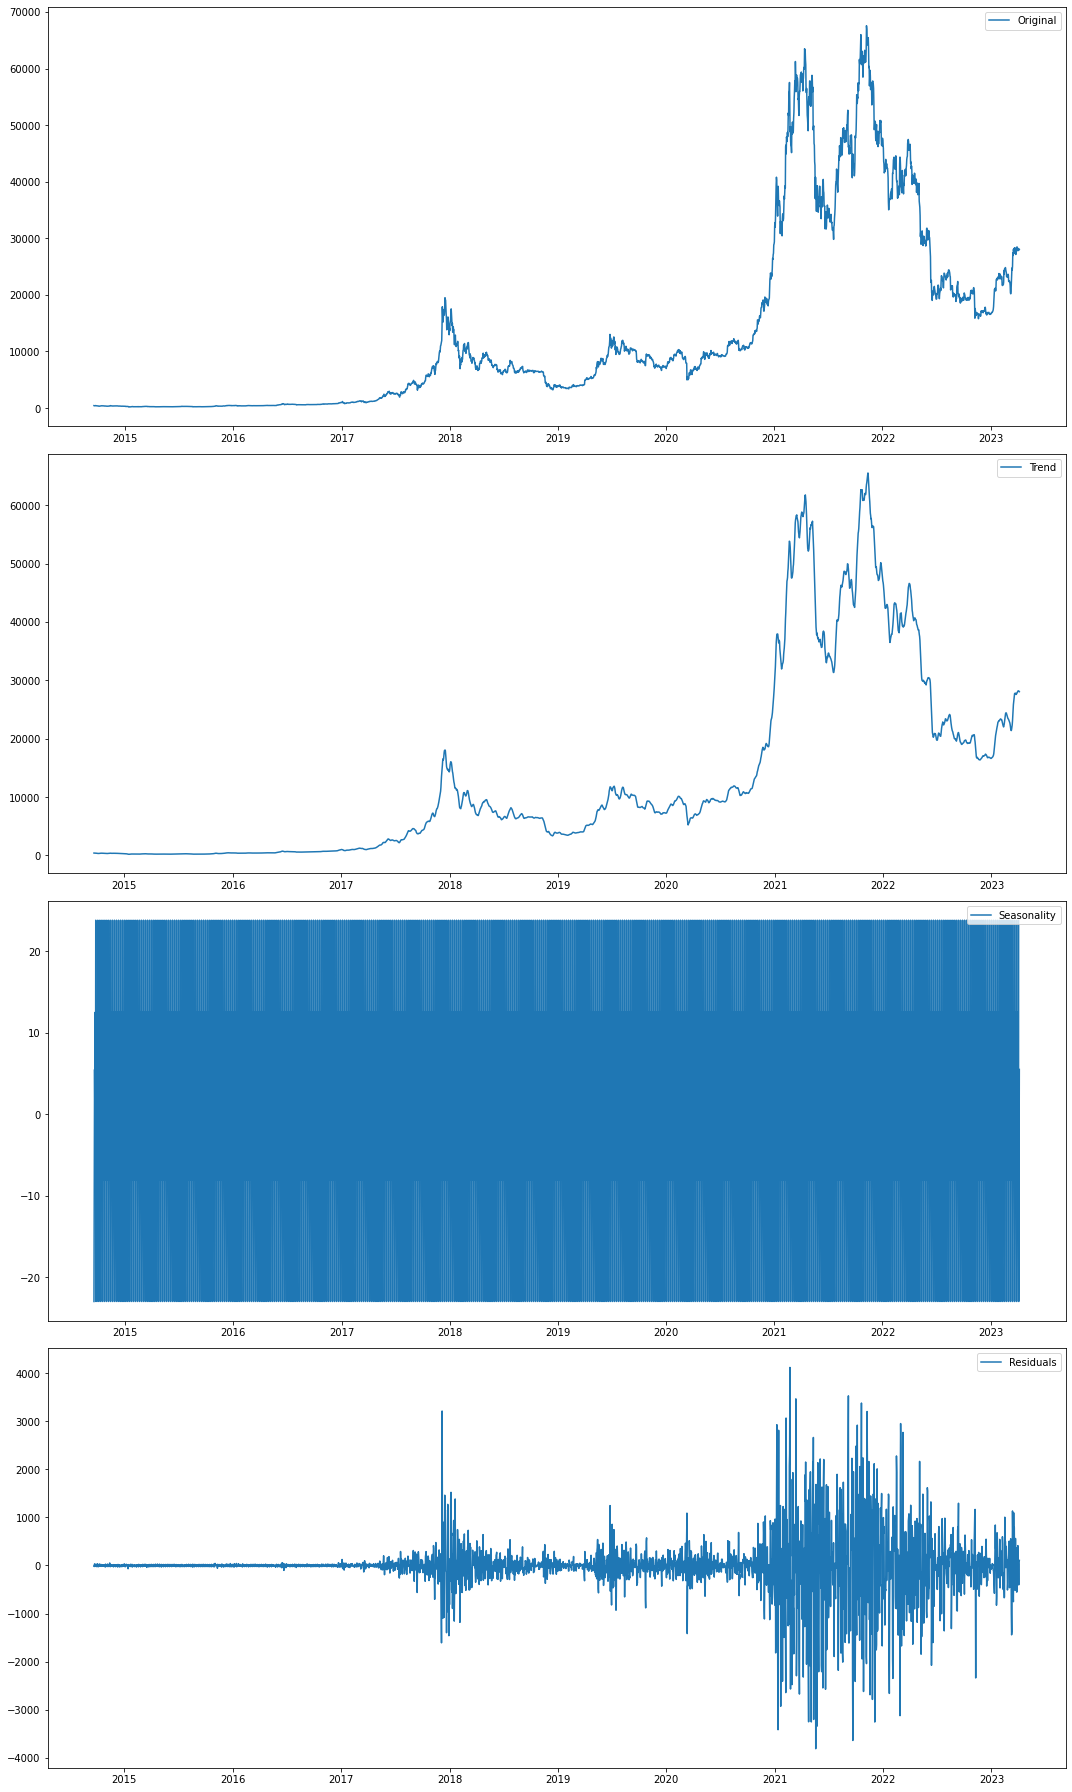

In [9]:
# Access the trend, seasonal, and residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(15, 25))

plt.subplot(411)
plt.plot(dit, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [10]:
prophet_model=Prophet()
dit2=df[['Date','Close']]
dit2=dit2.rename(columns={'Date':'ds','Close':'y'})
dit2

,ds,y
0,2014-09-18,424.440002
1,2014-09-19,394.795990
2,2014-09-20,408.903992
3,2014-09-21,398.821014
4,2014-09-22,402.152008
...,...,...
3120,2023-04-04,28168.089840
3121,2023-04-05,28177.984380
3122,2023-04-06,28044.140630
3123,2023-04-07,27925.859380


## Apply Prophet Model

In [11]:
# Fit the model to the training data
prophet_model.fit(dit2)

18:21:18 - cmdstanpy - INFO - Chain [1] start processing
18:21:25 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
future_dates = prophet_model.make_future_dataframe(periods=365)
future_dates

,ds
0,2014-09-18
1,2014-09-19
2,2014-09-20
3,2014-09-21
4,2014-09-22
...,...
3485,2024-04-03
3486,2024-04-04
3487,2024-04-05
3488,2024-04-06


In [13]:
forcast=prophet_model.predict(future_dates)
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-09-18,-255.795849,-7228.073506,4354.596705,-255.795849,-255.795849,-1170.199832,-1170.199832,-1170.199832,-17.446502,-17.446502,-17.446502,-1152.753330,-1152.753330,-1152.753330,0.0,0.0,0.0,-1425.995681
1,2014-09-19,-254.477349,-7412.571461,4252.454616,-254.477349,-254.477349,-1159.010039,-1159.010039,-1159.010039,-2.328409,-2.328409,-2.328409,-1156.681630,-1156.681630,-1156.681630,0.0,0.0,0.0,-1413.487388
2,2014-09-20,-253.158848,-6736.233143,4285.551122,-253.158848,-253.158848,-1140.452117,-1140.452117,-1140.452117,17.178132,17.178132,17.178132,-1157.630250,-1157.630250,-1157.630250,0.0,0.0,0.0,-1393.610966
3,2014-09-21,-251.840348,-7080.592524,4031.517356,-251.840348,-251.840348,-1166.280387,-1166.280387,-1166.280387,-10.722072,-10.722072,-10.722072,-1155.558314,-1155.558314,-1155.558314,0.0,0.0,0.0,-1418.120734
4,2014-09-22,-250.521847,-7517.082940,4313.448672,-250.521847,-250.521847,-1145.690178,-1145.690178,-1145.690178,4.697759,4.697759,4.697759,-1150.387936,-1150.387936,-1150.387936,0.0,0.0,0.0,-1396.212025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3485,2024-04-03,-6186.835109,-16116.331384,9554.984834,-18002.197592,6351.410526,2900.693126,2900.693126,2900.693126,21.805597,21.805597,21.805597,2878.887529,2878.887529,2878.887529,0.0,0.0,0.0,-3286.141983
3486,2024-04-04,-6244.008093,-16323.760340,10064.795554,-18135.204041,6361.933339,2753.150627,2753.150627,2753.150627,-17.446502,-17.446502,-17.446502,2770.597129,2770.597129,2770.597129,0.0,0.0,0.0,-3490.857466
3487,2024-04-05,-6301.181077,-16367.751168,10144.075954,-18233.071465,6372.456153,2650.888274,2650.888274,2650.888274,-2.328409,-2.328409,-2.328409,2653.216683,2653.216683,2653.216683,0.0,0.0,0.0,-3650.292802
3488,2024-04-06,-6358.354061,-16379.909636,9973.859906,-18327.295024,6382.978966,2546.089269,2546.089269,2546.089269,17.178132,17.178132,17.178132,2528.911137,2528.911137,2528.911137,0.0,0.0,0.0,-3812.264791


In [14]:
mae = np.mean(np.abs(forcast['yhat'] - dit2['y']))
mse = np.mean((forcast['yhat'] - dit2['y'])**2)
rmse = np.sqrt(mse)

In [15]:
mae

3019.8202985155863

In [16]:
mse

19247189.19094229

In [17]:
rmse

4387.161860581656

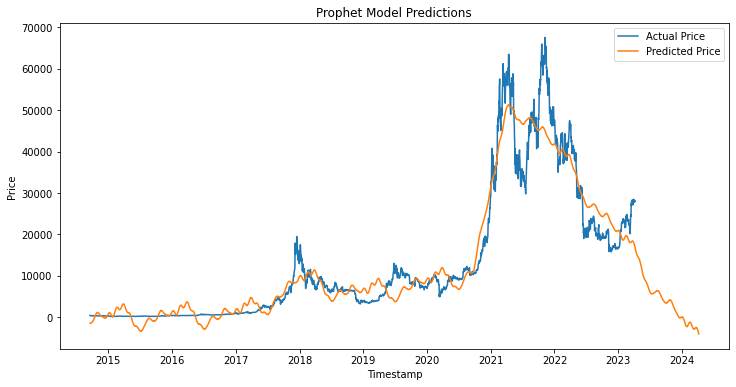

In [18]:
# Plot the predicted prices and the actual prices
plt.figure(figsize=(12, 6))
plt.plot(dit2['ds'], dit2['y'], label='Actual Price')
plt.plot(forcast['ds'], forcast['yhat'], label='Predicted Price')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Prophet Model Predictions')
plt.legend()
plt.show()

## Apply SARIMA Model

In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [20]:
# Assuming we want to use 80% of the data for training and 20% for testing
train_size = int(len(dit) * 0.8)
train_data = dit.iloc[:train_size]
test_data = dit.iloc[train_size:]
train_data

,y
ds,
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
2014-09-22,402.152008
...,...
2021-07-18,31796.810550
2021-07-19,30817.832030
2021-07-20,29807.347660


In [21]:
# Define the SARIMA model
sarima_model = SARIMAX(train_data['y'])

# Fit the model to the training data
sarima_result = sarima_model.fit()

# Generate predictions on the testing data
predictions = sarima_result.predict(start=test_data.index[0], end=test_data.index[-1])

# Evaluate the model's accuracy using appropriate metrics
mae = np.mean(np.abs(predictions - test_data['y']))
mse = np.mean((predictions - test_data['y'])**2)
rmse = np.sqrt(mse)

C:\Users\Faraz\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Faraz\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [22]:
predictions

2021-07-23    32313.024172
2021-07-24    32312.942875
2021-07-25    32312.861577
2021-07-26    32312.780280
2021-07-27    32312.698983
                  ...     
2023-04-04    32262.658922
2023-04-05    32262.577751
2023-04-06    32262.496580
2023-04-07    32262.415410
2023-04-08    32262.334240
Freq: D, Name: predicted_mean, Length: 625, dtype: float64

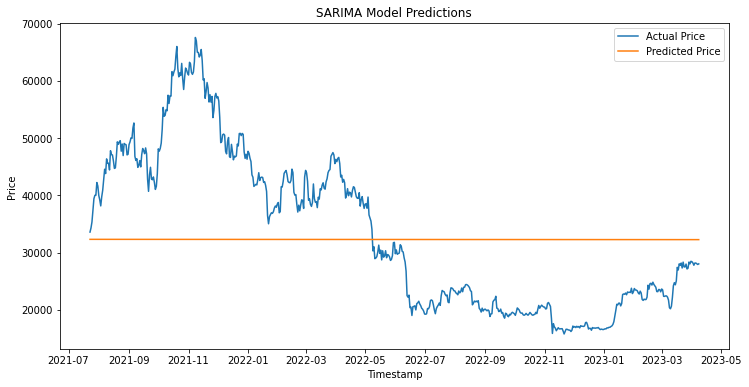

In [23]:
# Plot the predicted prices and the actual prices
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['y'], label='Actual Price')
plt.plot(test_data.index, predictions, label='Predicted Price')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('SARIMA Model Predictions')
plt.legend()
plt.show()

## Apply Arima Model 

In [24]:
from statsmodels.tsa.arima.model import ARIMA

In [25]:
# Define the ARIMA model
arima_model = ARIMA(train_data['y'])

# Fit the model to the training data
arima_result = arima_model.fit()

# Generate predictions on the testing data
predictions = arima_result.predict(start=test_data.index[0], end=test_data.index[-1])

# Evaluate the model's accuracy using appropriate metrics
mae = np.mean(np.abs(predictions - test_data['y']))
mse = np.mean((predictions - test_data['y'])**2)
rmse = np.sqrt(mse)

C:\Users\Faraz\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Faraz\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Faraz\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


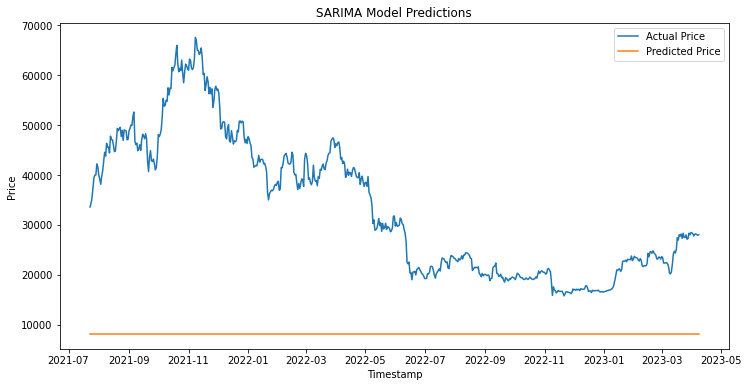

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['y'], label='Actual Price')
plt.plot(test_data.index, predictions, label='Predicted Price')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('SARIMA Model Predictions')
plt.legend()
plt.show()